In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [3]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

In [4]:
num_classes = dataset_info.features['label'].num_classes

num_training_example = 0
num_validation_example = 0

for example in training_set:
    num_training_example += 1
    
for example in validation_set:
    num_validation_example += 1
    
    print('Total number of classes {}'.format(num_classes))
    print('Number of training images {}'.format(num_training_example))
    print('Number of validation images {} \n'.format(num_validation_example))

Total number of classes 5
Number of training images 2569
Number of validation images 1 

Total number of classes 5
Number of training images 2569
Number of validation images 2 

Total number of classes 5
Number of training images 2569
Number of validation images 3 

Total number of classes 5
Number of training images 2569
Number of validation images 4 

Total number of classes 5
Number of training images 2569
Number of validation images 5 

Total number of classes 5
Number of training images 2569
Number of validation images 6 

Total number of classes 5
Number of training images 2569
Number of validation images 7 

Total number of classes 5
Number of training images 2569
Number of validation images 8 

Total number of classes 5
Number of training images 2569
Number of validation images 9 

Total number of classes 5
Number of training images 2569
Number of validation images 10 

Total number of classes 5
Number of training images 2569
Number of validation images 11 

Total number of cla

Total number of classes 5
Number of training images 2569
Number of validation images 294 

Total number of classes 5
Number of training images 2569
Number of validation images 295 

Total number of classes 5
Number of training images 2569
Number of validation images 296 

Total number of classes 5
Number of training images 2569
Number of validation images 297 

Total number of classes 5
Number of training images 2569
Number of validation images 298 

Total number of classes 5
Number of training images 2569
Number of validation images 299 

Total number of classes 5
Number of training images 2569
Number of validation images 300 

Total number of classes 5
Number of training images 2569
Number of validation images 301 

Total number of classes 5
Number of training images 2569
Number of validation images 302 

Total number of classes 5
Number of training images 2569
Number of validation images 303 

Total number of classes 5
Number of training images 2569
Number of validation images 304 


Total number of classes 5
Number of training images 2569
Number of validation images 572 

Total number of classes 5
Number of training images 2569
Number of validation images 573 

Total number of classes 5
Number of training images 2569
Number of validation images 574 

Total number of classes 5
Number of training images 2569
Number of validation images 575 

Total number of classes 5
Number of training images 2569
Number of validation images 576 

Total number of classes 5
Number of training images 2569
Number of validation images 577 

Total number of classes 5
Number of training images 2569
Number of validation images 578 

Total number of classes 5
Number of training images 2569
Number of validation images 579 

Total number of classes 5
Number of training images 2569
Number of validation images 580 

Total number of classes 5
Number of training images 2569
Number of validation images 581 

Total number of classes 5
Number of training images 2569
Number of validation images 582 


Total number of classes 5
Number of training images 2569
Number of validation images 889 

Total number of classes 5
Number of training images 2569
Number of validation images 890 

Total number of classes 5
Number of training images 2569
Number of validation images 891 

Total number of classes 5
Number of training images 2569
Number of validation images 892 

Total number of classes 5
Number of training images 2569
Number of validation images 893 

Total number of classes 5
Number of training images 2569
Number of validation images 894 

Total number of classes 5
Number of training images 2569
Number of validation images 895 

Total number of classes 5
Number of training images 2569
Number of validation images 896 

Total number of classes 5
Number of training images 2569
Number of validation images 897 

Total number of classes 5
Number of training images 2569
Number of validation images 898 

Total number of classes 5
Number of training images 2569
Number of validation images 899 


In [5]:
for i, example in enumerate(training_set.take(5)):
    print('Images {} Shape: {} Labels: {}'.format(i+1, example[0].shape, example[1]))

Images 1 Shape: (333, 500, 3) Labels: 2
Images 2 Shape: (212, 320, 3) Labels: 3
Images 3 Shape: (240, 320, 3) Labels: 3
Images 4 Shape: (240, 320, 3) Labels: 4
Images 5 Shape: (317, 500, 3) Labels: 3


In [12]:
IMAGE_RES = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES,IMAGE_RES))/255.0
    return image, label

BATCH_SIZE = 32
    
train_batches = training_set.shuffle(num_training_example//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
    
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [13]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL,
                                  input_shape=(IMAGE_RES,IMAGE_RES, 3))

In [14]:
feature_extractor.trainable = False

In [15]:
model = tf.keras.Sequential([feature_extractor,layers.Dense(num_classes)])

In [18]:
model.compile(optimizer='adam',
             loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

epochs = 2

history = model.fit(train_batches,
                   epochs=epochs,
                   validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 59s 718ms/step - loss: 0.2090 - accuracy: 0.9389 - val_loss: 0.2746 - val_accuracy: 0.9110
Epoch 2/2
81/81 [==============================] - 58s 722ms/step - loss: 0.1701 - accuracy: 0.9510 - val_loss: 0.2785 - val_accuracy: 0.9019


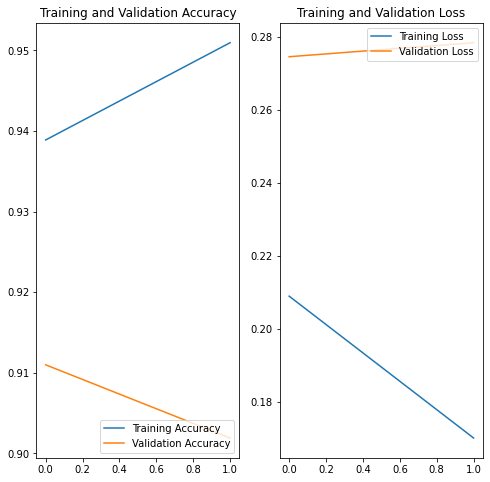

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)


['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [22]:
image_batch, label_batch = next(iter(train_batches))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

['roses' 'daisy' 'sunflowers' 'sunflowers' 'roses' 'tulips' 'tulips'
 'roses' 'tulips' 'daisy' 'roses' 'sunflowers' 'tulips' 'sunflowers'
 'daisy' 'dandelion' 'sunflowers' 'daisy' 'dandelion' 'tulips' 'dandelion'
 'sunflowers' 'tulips' 'dandelion' 'dandelion' 'daisy' 'tulips'
 'sunflowers' 'daisy' 'dandelion' 'daisy' 'tulips']


In [23]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [4 1 4 3 4 2 2 4 2 1 4 3 2 3 1 0 3 1 0 2 0 3 2 0 0 1 2 3 1 0 1 2]
Predicted labels:  [4 1 3 3 4 2 2 4 2 1 4 3 2 3 1 0 3 1 0 2 0 3 2 0 0 1 2 3 1 0 1 2]


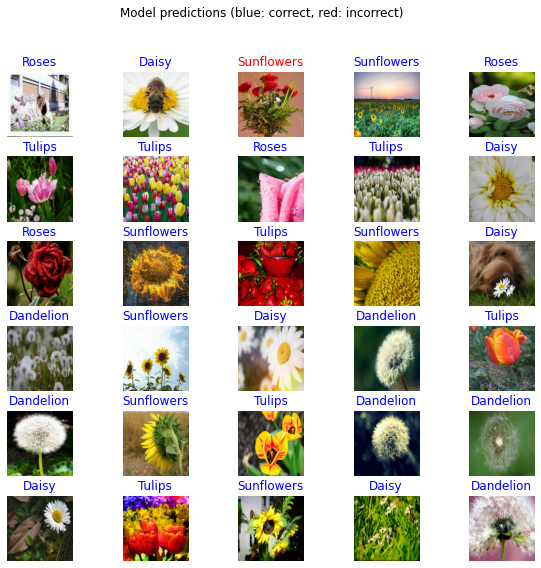

In [25]:
plt.figure(figsize=(10,9))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# Transfer Learning Inception Model

In [27]:
IMAGE_RES = 299

(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers', 
    with_info=True, 
    as_supervised=True, 
    split=['train[:70%]', 'train[70%:]'],
)
train_batches = training_set.shuffle(num_training_example//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(URL,
  input_shape=(IMAGE_RES, IMAGE_RES, 3),
  trainable=False)

model_inception = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

model_inception.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              21802784  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [29]:
model_inception.compile(
  optimizer='adam', 
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 2

history = model_inception.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/2
81/81 [==============================] - 359s 4s/step - loss: 0.5746 - accuracy: 0.8143 - val_loss: 0.4038 - val_accuracy: 0.8692
Epoch 2/2
81/81 [==============================] - 356s 4s/step - loss: 0.3550 - accuracy: 0.8859 - val_loss: 0.3435 - val_accuracy: 0.8901
